In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Data

In [2]:
# read the data
data = pd.read_csv('census_data.csv')
data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [3]:
# Transform data to integer

modeling_data = data.copy()
modeling_data.replace(regex={r'[a]. ': 1, r'[b]. ': 2,r'[c]. ': 3, r'[d]. ': 4,r'[e]. ': 5}, inplace = True)
modeling_data.head()
modeling_data_test = modeling_data[modeling_data.flag == 'test']
modeling_data_train = modeling_data[modeling_data.flag == 'train']
modeling_data_train.head()
modeling_data_train.tail()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32556,2,4,3,1,2,2,2,2,2,train,0
32557,2,2,3,1,3,2,2,2,4,train,1
32558,2,2,2,1,2,2,2,2,4,train,0
32559,1,2,1,1,3,2,2,2,1,train,0
32560,2,5,3,3,2,2,2,2,5,train,1


In [4]:
# find the shape of data
data.shape

(48842, 11)

In [5]:
# Outliers
data.max()
data.min()

hours_per_week_bin         a. 0-30
occupation_bin              a. Low
msr_bin                     a. Low
capital_gl_bin              a. = 0
race_sex_bin                a. Low
education_num_bin           a. 0-8
education_bin               a. Low
workclass_bin         a. no income
age_bin                    a. 0-25
flag                          test
y                                0
dtype: object

In [6]:
# find the number of null values
data.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [7]:
data.describe
data.info
data.dtypes
data.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [8]:
#split the dataset into feature variables and target variable
feature_cols = ['age_bin','capital_gl_bin', 'education_bin','hours_per_week_bin',
                'msr_bin','occupation_bin','race_sex_bin']
X = data[feature_cols] # feature
t = data.y # target

# split dataset into training set and test set
X_train, X_test, t_train, t_test = train_test_split(X,t,test_size = 0.3, random_state = 1) 
# 70% training and 30% testing


#transform the type of variables from object to float
encoder = OrdinalEncoder(cols = ['age_bin','capital_gl_bin', 'education_bin','hours_per_week_bin',
                                 'msr_bin','occupation_bin','race_sex_bin'], 
                         handle_unknown = 'value', 
                         handle_missing = 'value').fit(X_train,t_train) 

X_train = encoder.transform(X_train) # training 
X_test = encoder.transform(X_test)# testing

# Finding Optimal Value of a key Hyper-parameter

<AxesSubplot:>

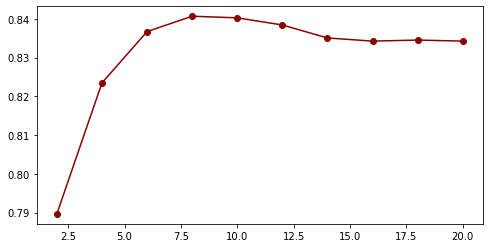

In [9]:
results = [] # create an empty list
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state =101) # create a decision tree model
    model.fit(X_train,t_train)
    y_pred =model.predict(X_test) # find the model's predict value
    accuracy=np.mean(t_test ==y_pred) # compare the test value and predict value, find the accuracy
    results.append(accuracy) # put the value of accuracy to the empty list

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred', marker='o')

# Building a Random Forest Model

<AxesSubplot:>

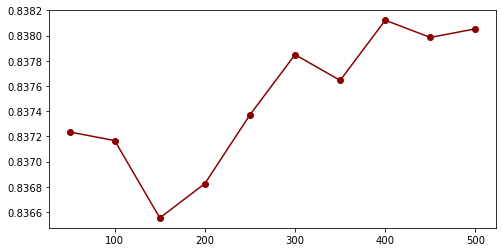

In [10]:
results = [] # create an empty list
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_options:
    model=RandomForestClassifier(n_estimators=trees, random_state=101) # create a random forest model
    model.fit(X_train, t_train)
    y_pred =model.predict(X_test) # find the model's predict value
    accuracy =np.mean(t_test == y_pred) # compare the test and predict value, find the accuracy
    results.append(accuracy) # put the value of accuracy to the empty list
    
plt.figure(figsize =(8,4))
pd.Series(results, n_estimator_options).plot(color='darkred',marker='o')

# Building AdaBoost, Gradient Boost (classifier) and XGB Model

<AxesSubplot:>

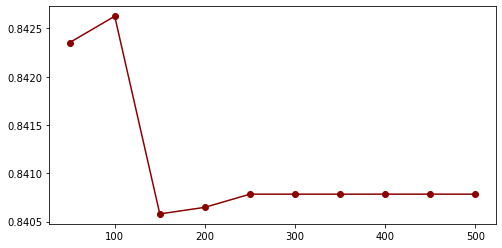

In [12]:
results = [] # create an empty list
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_options:
    model =AdaBoostClassifier(n_estimators = trees, random_state=101) # create a AdaBoost model
    model.fit(X_train, t_train)
    y_pred = model.predict(X_test) # find the model's predict value
    accuracy =np.mean(t_test==y_pred) # compare the test and predict value, find the accuracy
    results.append(accuracy) # put the value of accuracy to the empty list
    
plt.figure(figsize =(8,4))
pd.Series(results,n_estimator_options).plot(color='darkred', marker='o')

In [ ]:
results = [] # create an empty list
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_options:
  model = GradientBoostingClassifier(n_estimators = trees, random_state=101) # create a Gradient boosting model
  model.fit(X_train, t_train)
  y_pred = model.predict(X_test) # find the model's predict value
  accuracy = np.mean(t_test == y_pred) # compare the test and predict value, find the accuracy
  results.append(accuracy) # put the value of accuracy to the empty  list

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_options).plot(color='darkred', marker='o')

In [ ]:
results=[] # create an empty list
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_options:
    model = XGBClassifier(n_estimators = trees, random_state = 101) # create a XGB model
    model.fit(X_train, t_train)
    y_pred = model.predict(X_test) # find the model's predict value
    accuracy = np.mean(t_test==y_pred) # compare the test and predict value, find the accuracy
    results.append(accuracy) # put the value of accuracy to the empty list
    
plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_options).plot(color='darkred',marker ='o')

# Compare the Performance

In [ ]:
n_estimator = [100]
for trees in n_estimator:

  model1 = RandomForestClassifier(n_estimators = trees, random_state = 101) #Random Forest
  model1.fit(X_train, t_train)
  y_pred1 = model1.predict(X_test)
  fpr, tpr, thresholds = roc_curve(t_test, y_pred1) #sklearn.metrics.roc_curve return fpr, tpr, and thresholds
  auc1 = auc(fpr, tpr)
  accuracy1 = np.mean(t_test == y_pred1)

  model2 = AdaBoostClassifier(n_estimators = trees, random_state = 101) #AdaBoost
  model2.fit(X_train, t_train)
  y_pred2 = model2.predict(X_test)
  fpr, tpr, thresholds = roc_curve(t_test, y_pred2) #sklearn.metrics.roc_curve return fpr, tpr, and thresholds
  auc2 = auc(fpr, tpr)
  accuracy2 = np.mean(t_test == y_pred2)
  
  model3 = GradientBoostingClassifier(n_estimators = trees, random_state = 101) #Gradient Boost
  model3.fit(X_train, t_train)
  y_pred3 = model3.predict(X_test)
  fpr, tpr, thresholds = roc_curve(t_test, y_pred3) #sklearn.metrics.roc_curve return fpr, tpr, and thresholds
  auc3 = auc(fpr, tpr)
  accuracy3 = np.mean(t_test == y_pred3)

  model4 = XGBClassifier(n_estimators = trees, random_state = 101) #XGB
  model4.fit(X_train, t_train)
  y_pred4 = model4.predict(X_test)
  fpr, tpr, thresholds = roc_curve(t_test, y_pred4) #sklearn.metrics.roc_curve return fpr, tpr, and thresholds
  auc4 = auc(fpr, tpr)
  accuracy4 = np.mean(t_test == y_pred4)

In [ ]:
table = {'Random Forest': (accuracy1, auc1, trees), 
          'AdaBoost': (accuracy2, auc2, trees),
          'Gradient Boost': (accuracy3, auc3, trees),
          'XGB': (accuracy4, auc4, trees),}

  df = pd.DataFrame(table, index= ('Accuracy', 'AUC', 'Hyper-parameters'))
  display(df)